#### REST COUNTRIES API

In [72]:
from methods import get_all_countries, create_countries_dataframe
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [55]:
get_all_countries("https://restcountries.com/v3.1/all")

[{'name': {'common': 'Christmas Island',
   'official': 'Territory of Christmas Island',
   'nativeName': {'eng': {'official': 'Territory of Christmas Island',
     'common': 'Christmas Island'}}},
  'tld': ['.cx'],
  'cca2': 'CX',
  'ccn3': '162',
  'cca3': 'CXR',
  'independent': False,
  'status': 'officially-assigned',
  'unMember': False,
  'currencies': {'AUD': {'name': 'Australian dollar', 'symbol': '$'}},
  'idd': {'root': '+6', 'suffixes': ['1']},
  'capital': ['Flying Fish Cove'],
  'altSpellings': ['CX', 'Territory of Christmas Island'],
  'region': 'Oceania',
  'subregion': 'Australia and New Zealand',
  'languages': {'eng': 'English'},
  'translations': {'ara': {'official': 'جزيرة كريسماس',
    'common': 'جزيرة كريسماس'},
   'bre': {'official': 'Tiriad Enez Christmas', 'common': 'Enez Christmas'},
   'ces': {'official': 'Teritorium Vánočního ostrova',
    'common': 'Vánoční ostrov'},
   'cym': {'official': 'Tiriogaeth yr Ynys y Nadolig',
    'common': 'Ynys y Nadolig'},
  

In [56]:
all_countries = get_all_countries("https://restcountries.com/v3.1/all")

In [57]:
countries_df = create_countries_dataframe(all_countries)

In [58]:
countries_df.head()

,Country,Capital,Population,Area,Region,Subregion,Languages
0,Christmas Island,Flying Fish Cove,2072,135.0,Oceania,Australia and New Zealand,English
1,Eritrea,Asmara,5352000,117600.0,Africa,Eastern Africa,"Arabic, English, Tigrinya"
2,Samoa,Apia,198410,2842.0,Oceania,Polynesia,"English, Samoan"
3,North Macedonia,Skopje,2077132,25713.0,Europe,Southeast Europe,Macedonian
4,Djibouti,Djibouti,988002,23200.0,Africa,Eastern Africa,"Arabic, French"


In [59]:
countries_df.isnull().sum()

Country       0
Capital       0
Population    0
Area          0
Region        0
Subregion     0
Languages     0
dtype: int64

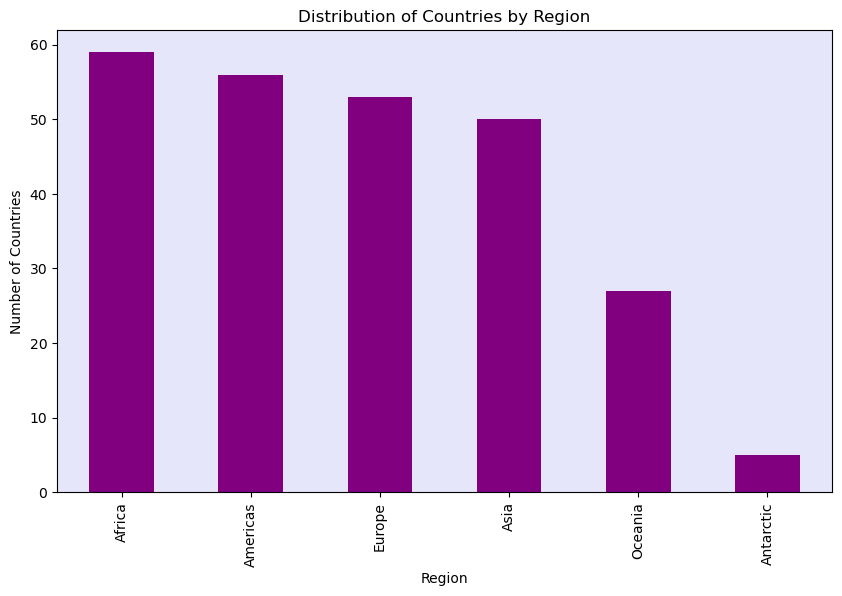

In [65]:
# Calculate the number of countries by region
region_counts = countries_df['Region'].value_counts()

background_color = '#E6E6FA'

# Create a bar chart
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Countries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.gca().set_facecolor(background_color)
plt.show()

In [68]:
# Sort the DataFrame by population
df_sorted_by_population = countries_df.sort_values(by='Population', ascending=False)

# Select the top 10 countries by population
top_10_population = df_sorted_by_population.head(10)

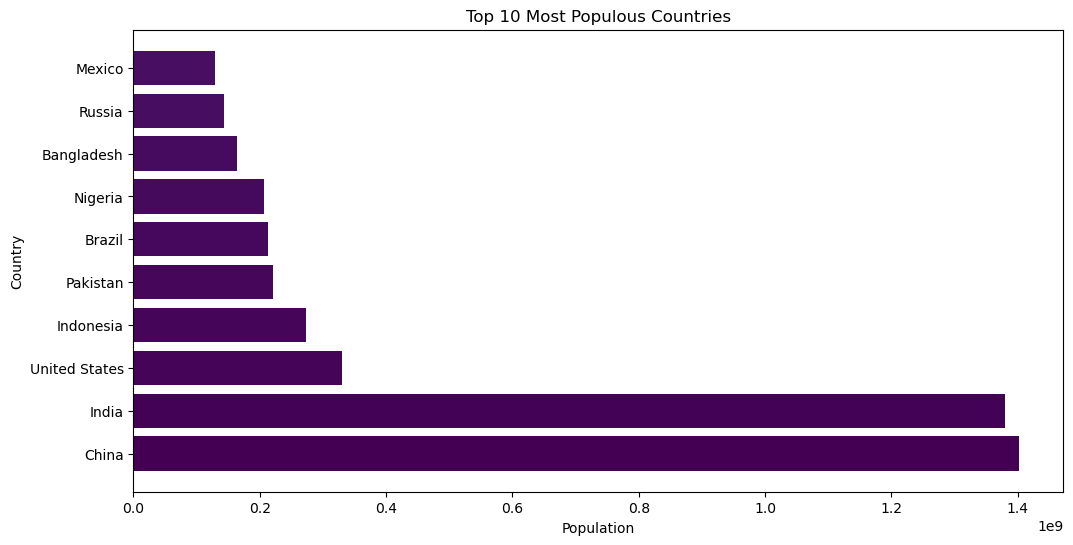

In [69]:
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis.colors
plt.barh(top_10_population['Country'], top_10_population['Population'], color=colors)
plt.title('Top 10 Most Populous Countries')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

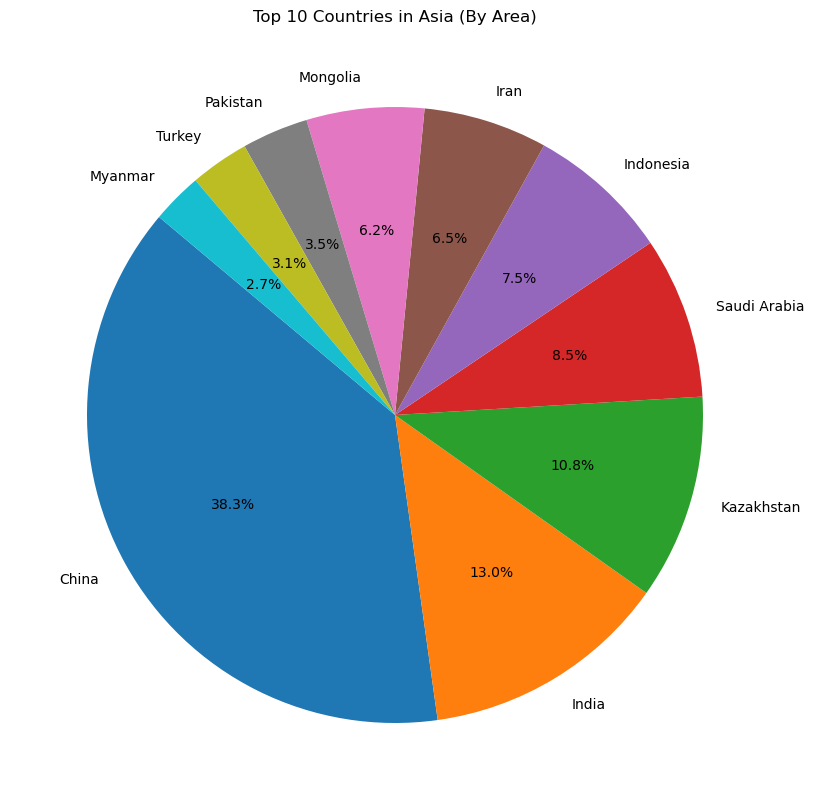

In [78]:
# Select countries in the Asia region
asia_countries = countries_df[countries_df['Region'] == 'Asia']

# Sort countries in Asia by area
top_10_asia_area = asia_countries.sort_values(by='Area', ascending=False).head(10)

# Create a pie chart for the top 10
plt.figure(figsize=(10, 10))
plt.pie(top_10_asia_area['Area'], labels=top_10_asia_area['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries in Asia (By Area)')
plt.show()

In [85]:
# Sort countries by density in descending order
df_sorted_by_density = countries_df.sort_values(by='Density', ascending=False)

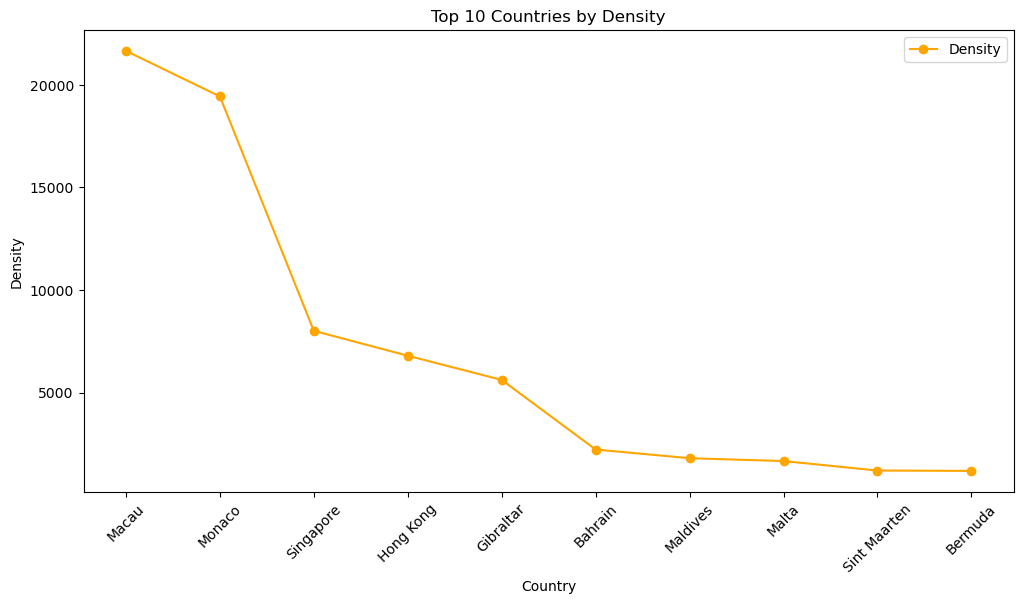

In [88]:
# Top 10 countries by density
top_10_density = df_sorted_by_density.head(10)

# Create a line plot for Density
plt.figure(figsize=(12, 6))

# Plot Density
plt.plot(top_10_density['Country'], top_10_density['Density'], marker='o', label='Density', color='orange')

plt.title('Top 10 Countries by Density')
plt.xlabel('Country')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [98]:
# The five most crowded capitals.
df_sorted_by_population_capital = countries_df.sort_values(by="Population",ascending=False)
df_sorted_by_population_capital.head()

,Country,Capital,Population,Area,Region,Subregion,Languages,Density
84,China,Beijing,1402112000,9706961.0,Asia,Eastern Asia,Chinese,144.443972
100,India,New Delhi,1380004385,3287590.0,Asia,Southern Asia,"English, Hindi, Tamil",419.761705
231,United States,"Washington, D.C.",329484123,9372610.0,Americas,North America,English,35.153935
110,Indonesia,Jakarta,273523621,1904569.0,Asia,South-Eastern Asia,Indonesian,143.614446
6,Pakistan,Islamabad,220892331,881912.0,Asia,Southern Asia,"English, Urdu",250.469810


In [99]:
# Calculating sum of population in every region
region_population = countries_df.groupby('Region')['Population'].sum().sort_values()

In [100]:
region_population

Region
Antarctic          1430
Oceania        43119432
Europe        746934072
Americas     1020976420
Africa       1362095235
Asia         4604594974
Name: Population, dtype: int64

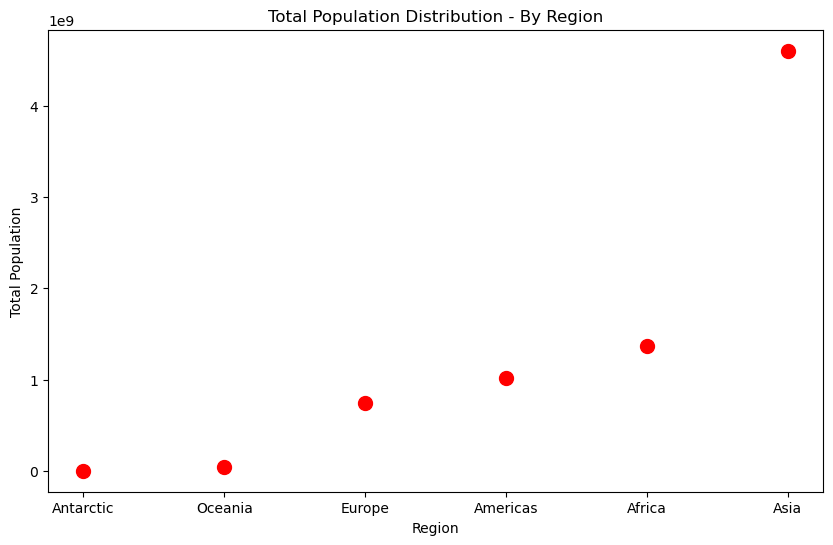

In [103]:
#Scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(region_population.index, region_population.values, color='red', s=100)
plt.title('Total Population Distribution - By Region')
plt.xlabel('Region')
plt.ylabel('Total Population')
plt.show()